Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
R-squared: 0.85
Mean Squared Error (MSE): 34438.09
Mean Absolute Error (MAE): 182.11


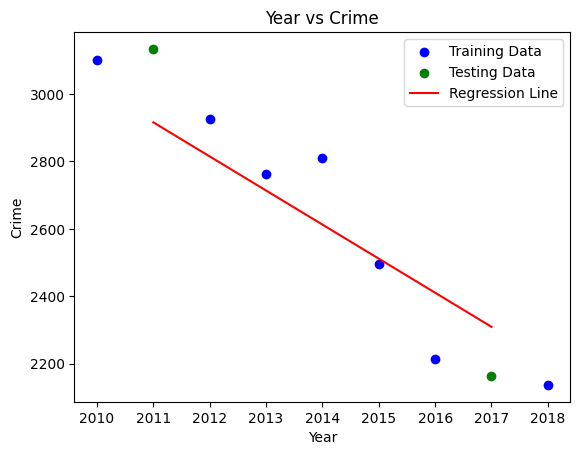

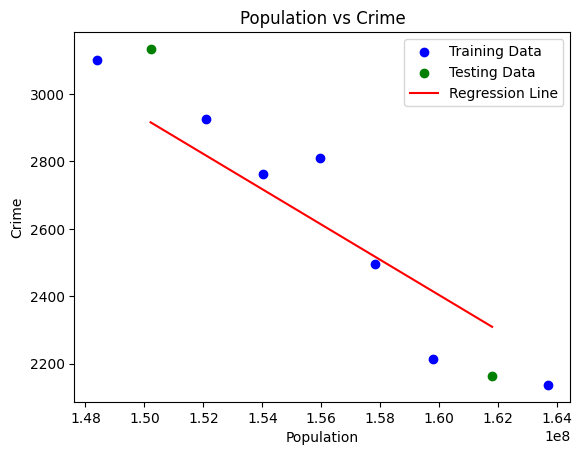

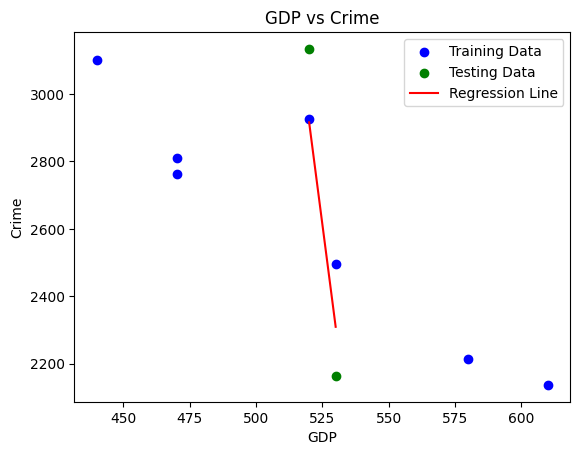

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Mount Google Drive
drive.mount("/content/gdrive")

# Load data from Excel file
data_path1 = '/content/gdrive/MyDrive/FYDP-2_DATA&Code/Separate_Data/Burglary.xlsx'
df = pd.read_excel(data_path1, header=None)  # Assuming no header is present in the Excel file

# Assign column names to the DataFrame
df.columns = ['Year', 'Population', 'GDP', 'Crime']

# Exclude the last instance
df = df[:-1]

# Define the features (independent variables) and target (dependent variable)
X = df[['Year', 'Population', 'GDP']]
y = df['Crime']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = regressor.predict(X_test)

# Calculate R-squared, MSE, and MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the calculated metrics
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Function to plot the data and regression line
def plot_regression(X_train, y_train, X_test, y_test, feature, xlabel, ylabel, title):
    plt.scatter(X_train[feature], y_train, color='blue', label='Training Data')
    plt.scatter(X_test[feature], y_test, color='green', label='Testing Data')
    plt.plot(X_test[feature], regressor.predict(X_test), color='red', label='Regression Line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Year vs Crime
plot_regression(X_train, y_train, X_test, y_test, 'Year', 'Year', 'Crime', 'Year vs Crime')

# Plot for Population vs Crime
plot_regression(X_train, y_train, X_test, y_test, 'Population', 'Population', 'Crime', 'Population vs Crime')

# Plot for GDP vs Crime
plot_regression(X_train, y_train, X_test, y_test, 'GDP', 'GDP', 'Crime', 'GDP vs Crime')
